In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [13]:
rep(c('o','d'),times = 3)


[1] "o" "d" "o" "d" "o" "d"

In [14]:
n = 20
n_2 = n/2
min_coord = 0
max_coord = 10
df = data.frame(
    x = runif(n,min_coord,max_coord),
    y = runif(n,min_coord,max_coord),
    path_id = rep(1:n_2, each=2),
    label = rep(c("o","d"),times=n_2)
) 
df


x,y,path_id,label
<dbl>,<dbl>,<int>,<fct>
9.193256,2.3646069,1,o
6.931845,0.5451225,1,d
8.482011,2.8916317,2,o
6.394602,1.0985134,2,d
8.892165,2.9027996,3,o
3.681596,7.6259777,3,d
5.051625,0.7987158,4,o
3.966073,1.3295841,4,d
1.522326,4.1720005,5,o


In [19]:
theme_set(new = theme_minimal())


In [59]:
df = bind_rows(df, 

data.frame(x = c(1.644259 ,8.812973), y = c(6.3041983,2.8455950),
           path_id = c(12,12), label = c('o','d'))
    
)
df

x,y,path_id,label
<dbl>,<dbl>,<dbl>,<chr>
9.193256,2.3646069,1,o
6.931845,0.5451225,1,d
8.482011,2.8916317,2,o
6.394602,1.0985134,2,d
8.892165,2.9027996,3,o
3.681596,7.6259777,3,d
5.051625,0.7987158,4,o
3.966073,1.3295841,4,d
1.522326,4.1720005,5,o


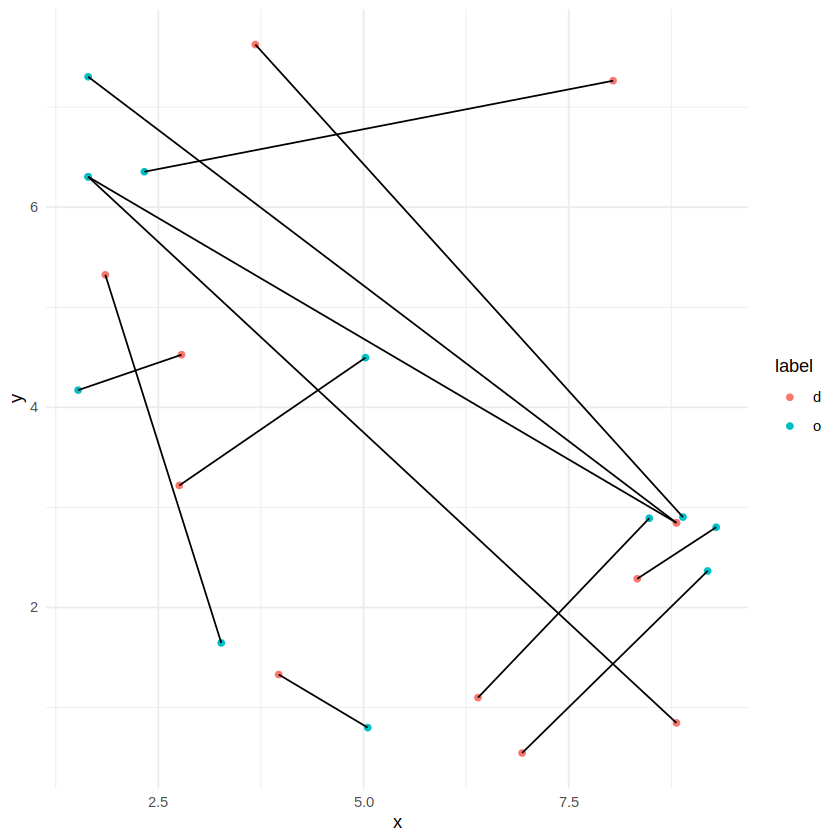

In [61]:
ggplot(data = df, aes(x = x, y = y, group = path_id))+
geom_point(aes(color = label))+
geom_path()
#path 8 as my target one

In [62]:
df_wide = df %>%
pivot_wider(id_cols = path_id, names_from = label, values_from = c(x,y)) 


In [ ]:
euclidean <- function(a, b) sqrt(sum((a - b)^2))

In [28]:
focal_x = df %>% filter(path_id == 8) %>% select(x,y) 
focal_x

x,y
<dbl>,<dbl>
1.644259,7.304198
8.812973,2.845595


In [63]:
focal_path = df_wide %>% filter(path_id == 8)

dist_from_focal = df_wide %>%
mutate(dist_o_o = sqrt((x_o-focal_path[['x_o']])^2 + (y_o-focal_path[['y_o']])^2),
       dist_d_d = sqrt((x_d-focal_path[['x_d']])^2 + (y_d-focal_path[['y_d']])^2),
       dist_o_d = sqrt((x_o-focal_path[['x_d']])^2 + (y_o-focal_path[['y_d']])^2),
       dist_d_o = sqrt((x_d-focal_path[['x_o']])^2 + (y_d-focal_path[['y_o']])^2),
       od_sum = dist_o_o + dist_d_d,
       od_cross_sum = od_sum + dist_o_d + dist_d_o
      ) %>%
select(path_id, dist_o_o:od_cross_sum)

In [87]:
dist_from_focal %>%
arrange(-od_sum)

path_id,dist_o_o,dist_d_d,dist_o_d,dist_d_o,od_sum,od_cross_sum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,8.479650,7.013066e+00,0.09769191,2.062591,15.492716,17.65300
7,5.886465,7.387850e+00,5.67486899,1.990846,13.274314,20.94003
4,7.343803,5.078457e+00,4.28222564,6.409902,12.422261,23.11439
1,9.021470,2.971669e+00,0.61315953,8.581590,11.993139,21.18789
2,8.137911,2.983423e+00,0.33414887,7.815132,11.121334,19.27062
6,4.393483,6.069552e+00,4.13333388,4.233415,10.463035,18.82978
10,8.879203,7.353320e-01,0.48611991,8.363458,9.614535,18.46411
5,3.134570,6.260569e+00,7.41032290,3.002264,9.395140,19.80773
9,1.170481,4.485678e+00,7.37270526,6.397045,5.656159,19.42591


Joining, by = "path_id"


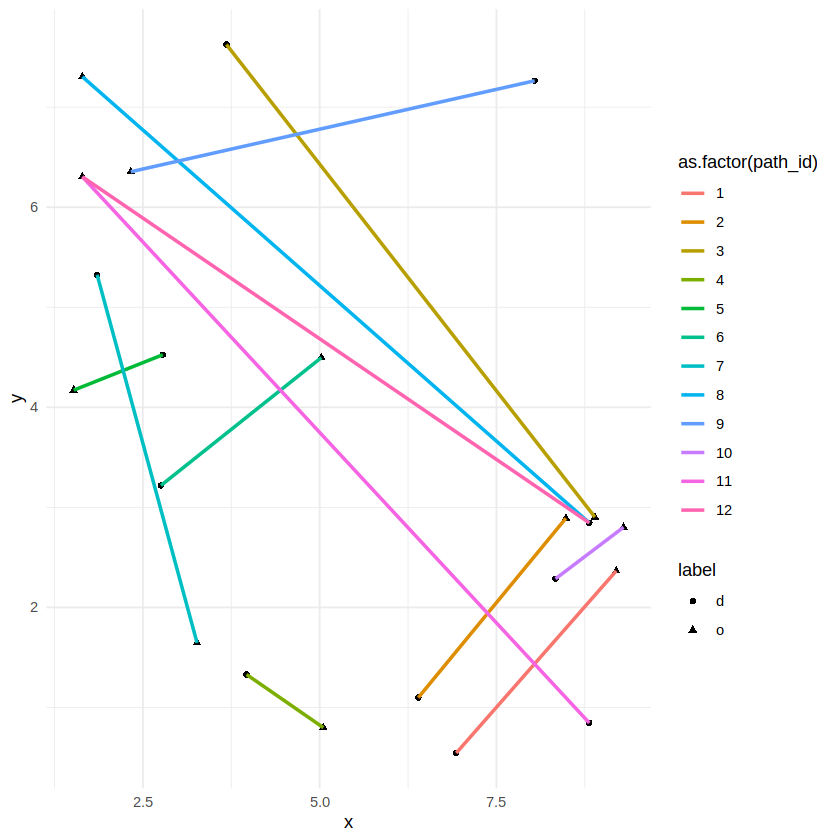

In [69]:
df %>%
left_join(dist_from_focal) %>%
ggplot(aes(x = x, y = y, group = path_id))+
geom_point(aes(shape = label))+
geom_path(aes(color = as.factor(path_id)), size= 1)#+
#scale_color_viridis_d()

Joining, by = "path_id"


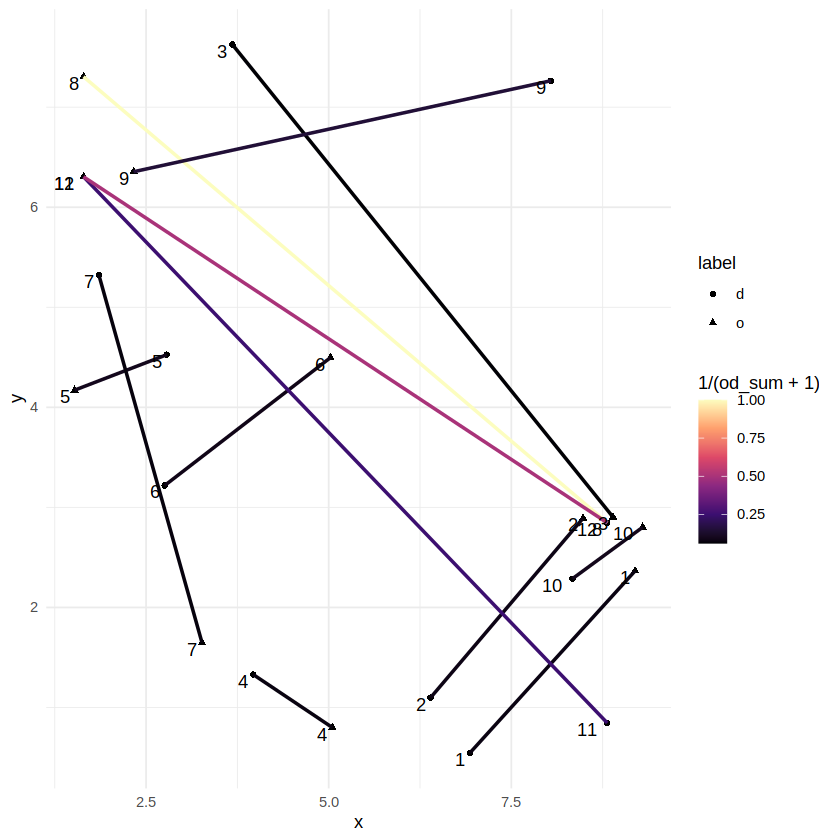

In [85]:
df %>%
left_join(dist_from_focal) %>%
ggplot(aes(x = x, y = y, group = path_id, label = path_id))+
geom_point(aes(shape = label))+
geom_path(aes(color = 1/(od_sum+1)), size= 1)+
scale_color_viridis_c(option='A')+
geom_text(hjust = 1.5, vjust = 1)